<a href="https://colab.research.google.com/github/davi-miquelim/regress-o-linear---Tensorflow/blob/main/crypto_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout


In [ ]:
crypto = "BTC-USD"
start = dt.datetime(2012, 1 ,1)
end = dt.datetime(2020,1,1)
data =web.DataReader(crypto, 'yahoo', start, end)

Epoch 1/200
58/58 [==============================] - 10s 106ms/step - loss: 0.0247
Epoch 2/200
58/58 [==============================] - 6s 109ms/step - loss: 0.0029
Epoch 3/200
58/58 [==============================] - 6s 110ms/step - loss: 0.0022
Epoch 4/200
58/58 [==============================] - 7s 115ms/step - loss: 0.0021
Epoch 5/200
58/58 [==============================] - 7s 115ms/step - loss: 0.0020
Epoch 6/200
58/58 [==============================] - 7s 115ms/step - loss: 0.0019
Epoch 7/200
58/58 [==============================] - 7s 116ms/step - loss: 0.0015
Epoch 8/200
58/58 [==============================] - 7s 118ms/step - loss: 0.0019
Epoch 9/200
58/58 [==============================] - 7s 118ms/step - loss: 0.0019
Epoch 10/200
58/58 [==============================] - 7s 119ms/step - loss: 0.0016
Epoch 11/200
58/58 [==============================] - 7s 117ms/step - loss: 0.0017
Epoch 12/200
58/58 [==============================] - 7s 117ms/step - loss: 0.0012
Epoch 13/200

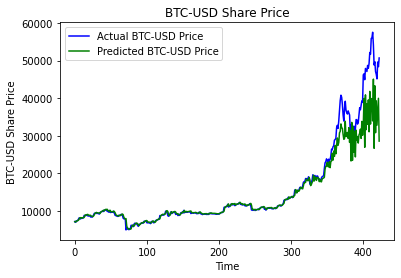

In [ ]:
# Prepare DAta
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 90

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x , 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the model
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units= 50 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units= 50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 200 , batch_size = 32)

# Test The Model accuracy on Existing Data

#Load Test Data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(crypto, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

model_inputs =  total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, ])

x_test = np.array(x_test)
x_test = np.reshape(x_test ,(x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# PLOT THE TEST PREDICTIONS
plt.plot(actual_prices, color = "blue", label = f"Actual {crypto} Price" )
plt.plot(predicted_prices, color = "green", label =f"Predicted {crypto} Price")
plt.title(f"{crypto} Share Price")
plt.xlabel("Time")
plt.ylabel(f'{crypto} Share Price')
plt.legend()
plt.show()


In [ ]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0 ]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[45454.848]]
